# 지역별 count와 날씨의 데이터 분석

In [1]:
import os
import sys

sys.path.append(os.path.abspath("/content/drive/MyDrive/70sEnt"))

In [2]:
cd /content/drive/MyDrive/70sEnt

/content/drive/MyDrive/70sEnt


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
from scipy.stats import pearsonr

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [5]:
# matplot lib에서 사용 가능한 한글 폰트
import matplotlib as mpl
plt.rc('font', family='NanumBarunGothic')
#set([i.name for i in mpl.font_manager.fontManager.ttflist])

# 데이터 불러오기

In [6]:
from Preprocessing import data_preprocessing

In [7]:
socar_file_path='/content/drive/MyDrive/00_Aiffelton/데이터/'
weather_file_path='/content/drive/MyDrive/00_Aiffelton/데이터/기상데이터/'
finedust_file_apth='/content/drive/MyDrive/00_Aiffelton/데이터/미세먼지/'
standard_time='time2'

In [ ]:
ts_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location=None)

- temp : 온도
- sensible_temp : 체감온도
- precipitation : 강수량
- humidty : 습도
- windspeed : 풍속
- finedust10 : 미세먼지
- finedust25 : 초미세먼지

# 날짜 가공

In [10]:
ts_df['month'] = pd.to_datetime(ts_df['datetime']).dt.month
ts_df['day'] = pd.to_datetime(ts_df['datetime']).dt.day
ts_df['hour'] = pd.to_datetime(ts_df['datetime']).dt.hour
ts_df['weekday'] = pd.to_datetime(ts_df['datetime']).dt.weekday

# 월 단위 count와 날씨의 scatterplot

In [12]:
weather_list = ['temp', 'sensible_temp', 'precipitation', 'humidity', 'windspeed', 'finedust10', 'finedust25']

In [59]:
month_weather_mean = ts_df.groupby('month')[['count', 'temp', 'sensible_temp', 'precipitation', 'humidity', 'windspeed', 'finedust10', 'finedust25']].mean()

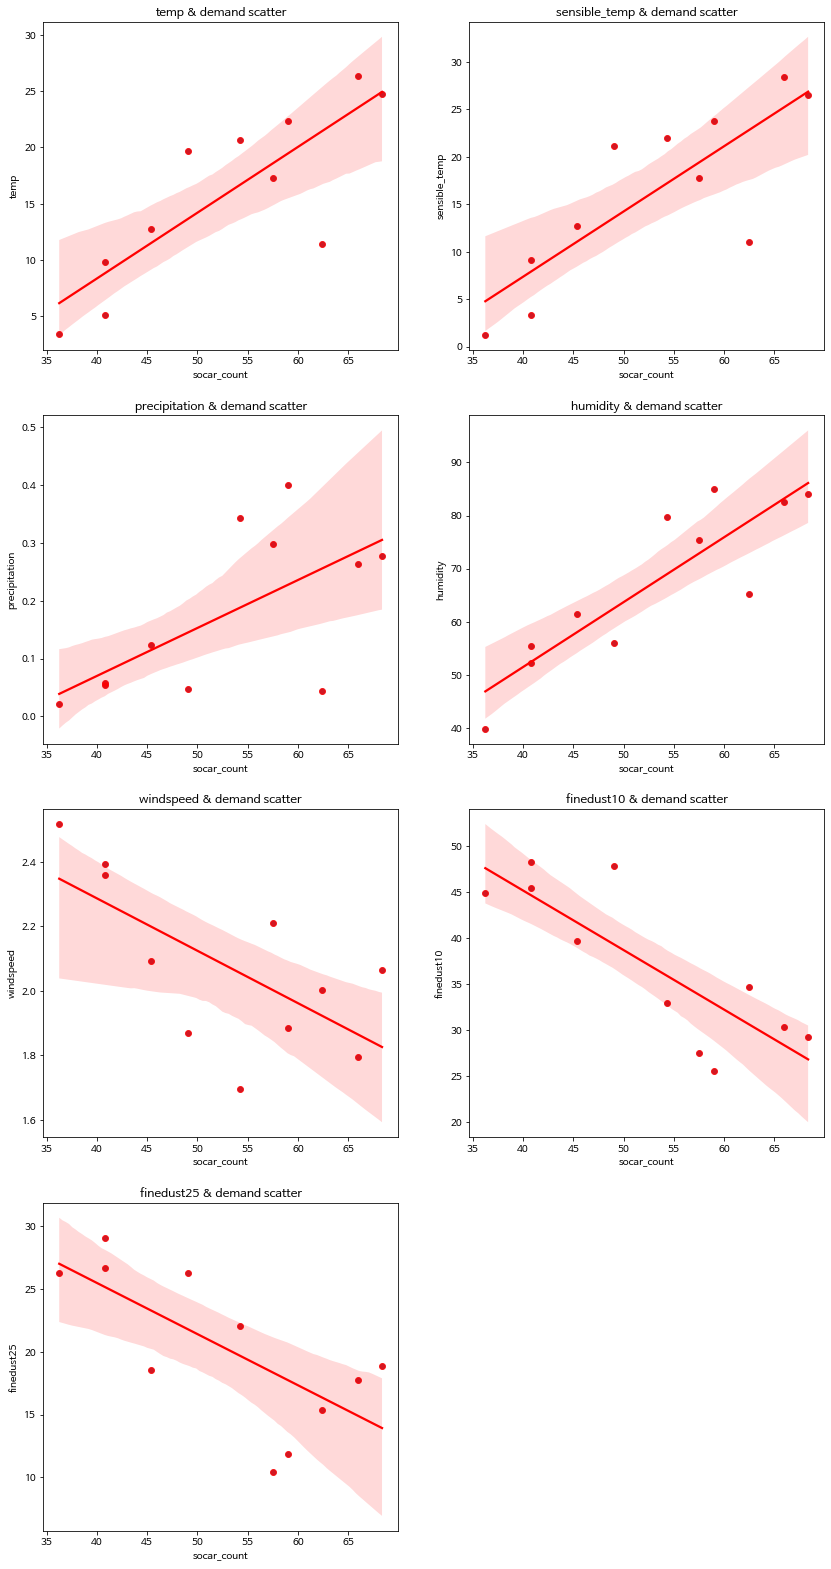

In [14]:
plt.figure(figsize=(14, 35))

for idx, weather in enumerate(weather_list):
  plt.subplot(5, 2, idx+1)
  plt.title(weather + ' & demand scatter')
  sns.scatterplot(data=month_weather_mean, x='count', y=weather)
  sns.regplot(data=month_weather_mean, x='count', y=weather, color='red')

- 온도, 체감온도, 강수량, 습도는 count와 양의 상관관계를 보임
- 풍속, 미세먼지, 초미세먼지는 count와 음의 상관관계를 보임
- 온도, 체감온도, 강수량, 습도, 미세먼지는 count와 강한 상관관계가 나타나는 것으로 보임
- 날씨와 count의 월별 상관관계는 적은 갯수의 상관성을 표현하여 신뢰성이 약간 떨어질 수 있다고 판단됨

# 일 단위 count와 날씨의 scatterplot

In [60]:
day_weather_a = ts_df[ts_df['month'] == 'a'].groupby('day')[['count', 'temp', 'sensible_temp', 'precipitation', 'humidity', 'windspeed', 'finedust10', 'finedust25']].mean()

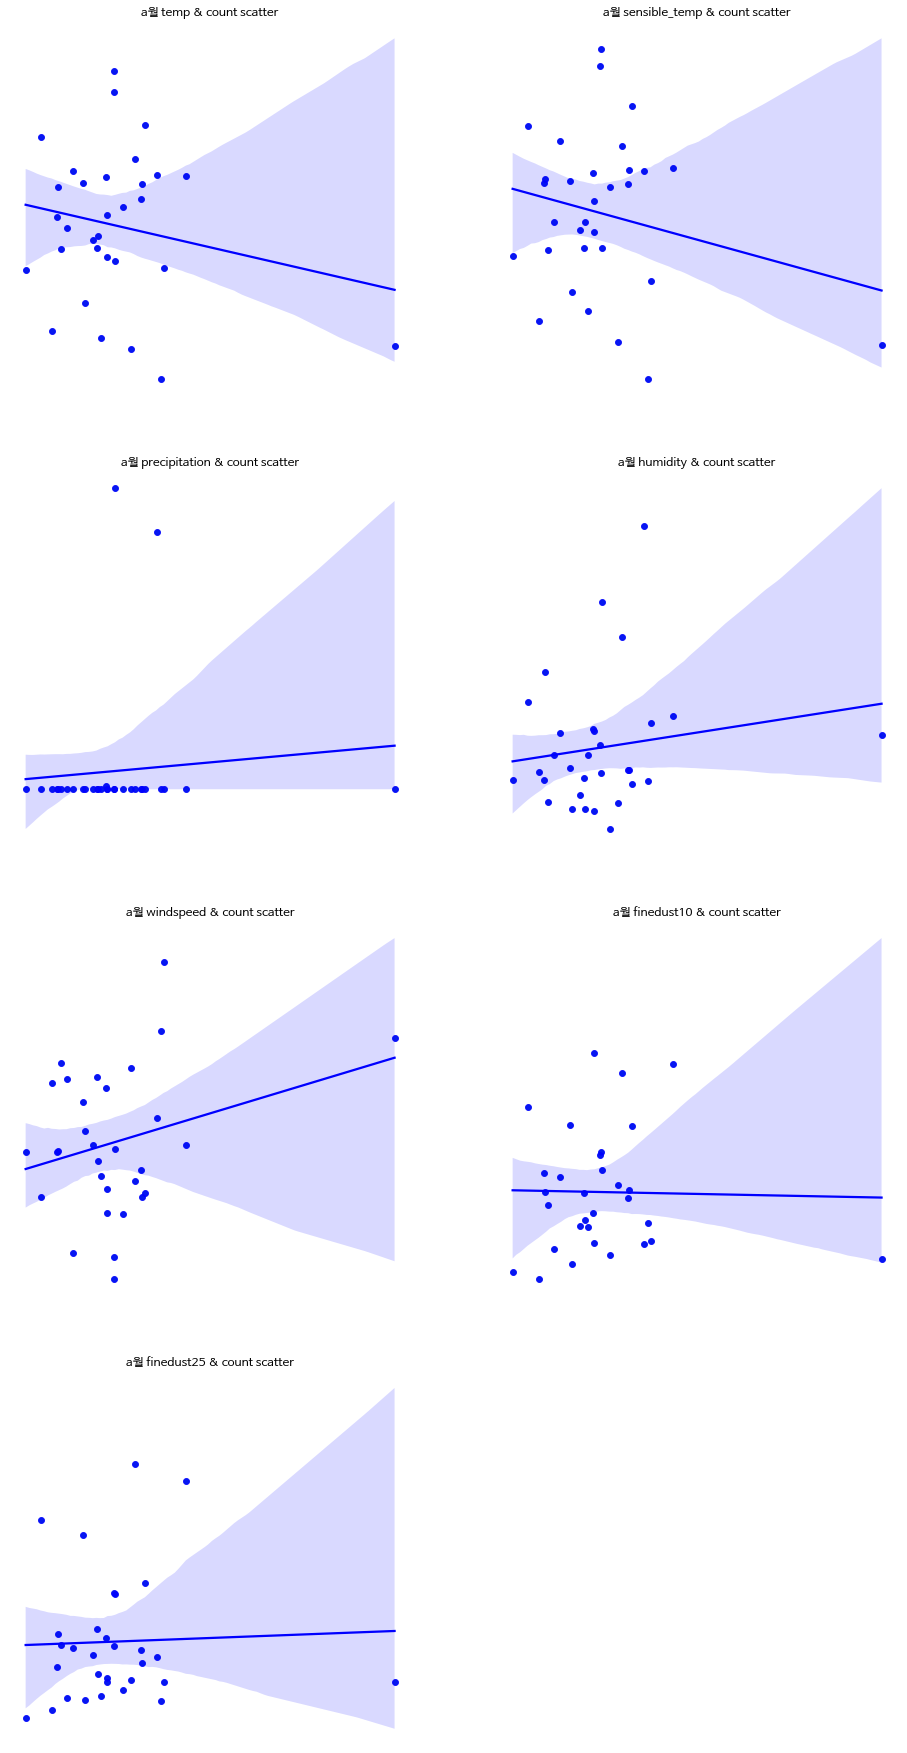

In [112]:
plt.figure(figsize=(16, 40))

for idx, weather in enumerate(weather_list):
  plt.subplot(5, 2, idx+1)
  plt.title('a월 ' + weather + ' & count scatter')
  sns.scatterplot(data=day_weather_a, x='count', y=weather)
  sns.regplot(data=day_weather_a, x='count', y=weather, color='blue')
  plt.axis('off')

In [115]:
def day_weather_scatter(month):
  day_weather_temp = ts_df[ts_df['month'] == month].groupby('day')[['count', 'temp', 'sensible_temp', 'precipitation', 'humidity', 'windspeed', 'finedust10', 'finedust25']].mean()

  plt.figure(figsize=(16, 40))

  for idx, weather in enumerate(weather_list):
    plt.subplot(5, 2, idx+1)
    plt.title(str(month) + '월 ' + weather + ' & count scatter')
    sns.scatterplot(data=day_weather_temp, x='count', y=weather)
    sns.regplot(data=day_weather_temp, x='count', y=weather, color='blue')
    plt.axis('off')

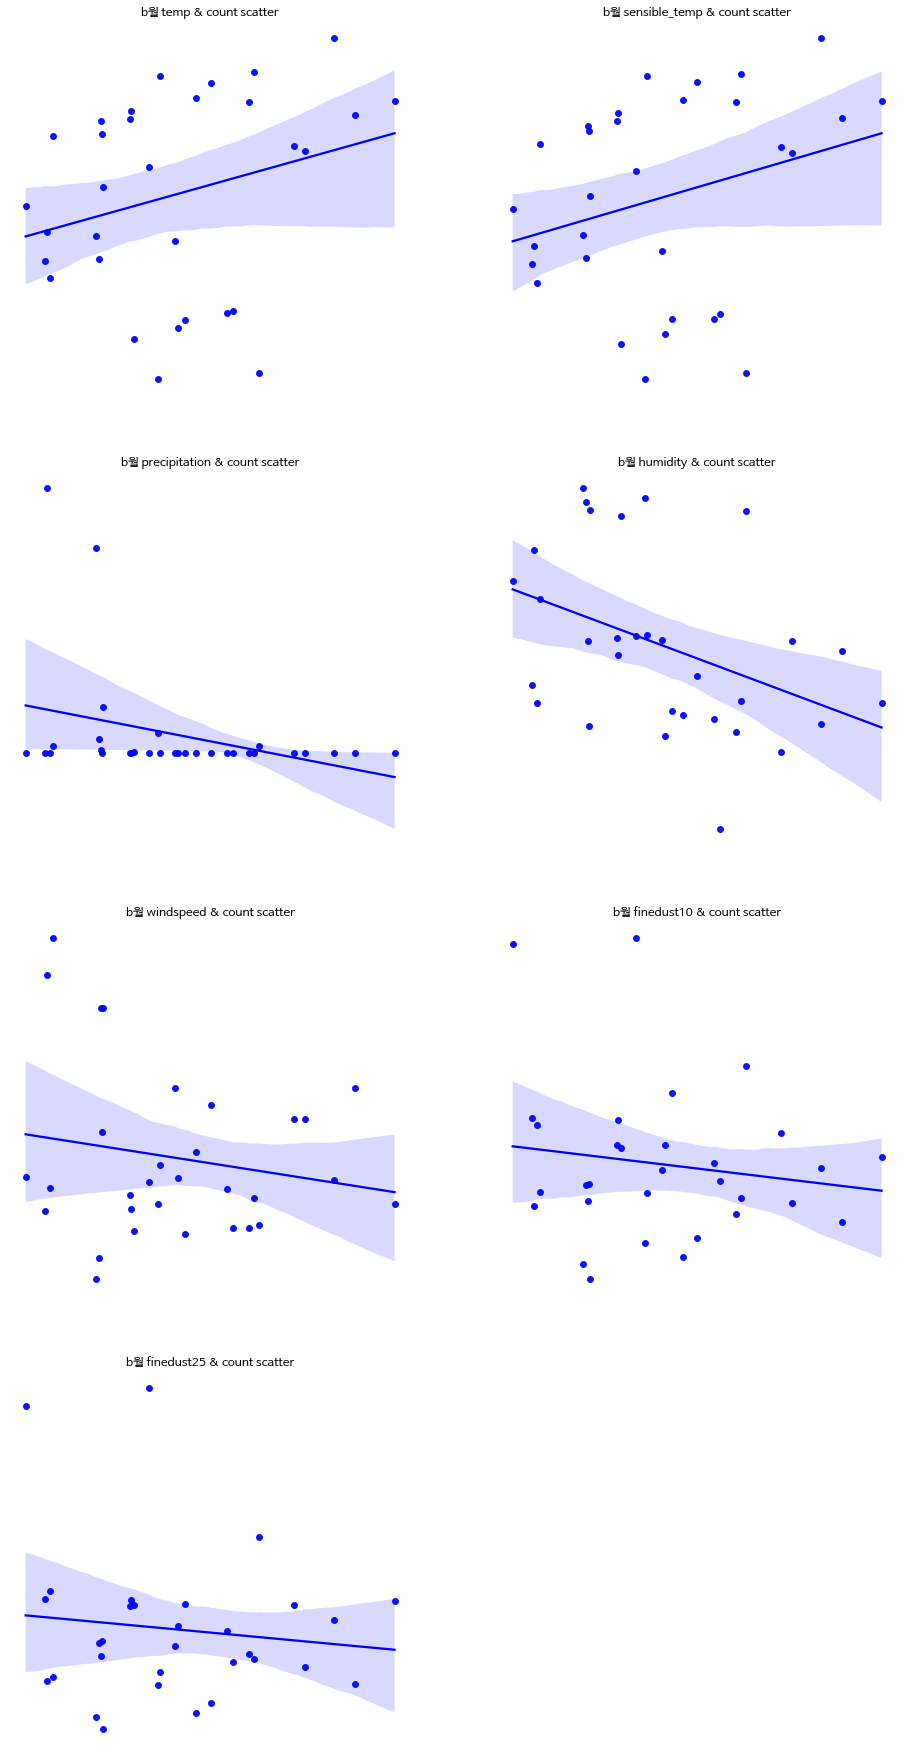

In [116]:
day_weather_scatter('b')

In [69]:
weather_corr_temp = pd.DataFrame(range(7))

In [73]:
for m in range(1, 12):
  day_weather_temp = ts_df[ts_df['month'] == m].groupby('day')[['count', 'temp', 'sensible_temp', 'precipitation', 'humidity', 'windspeed', 'finedust10', 'finedust25']].mean()
  month_corr_temp = []

  for w in weather_list:
    month_corr_temp.append(pearsonr(day_weather_temp['count'], day_weather_temp[w])[0])

  month_corr_df = pd.DataFrame(month_corr_temp)
  weather_corr_temp = pd.concat([weather_corr_temp, month_corr_df], axis=1)

In [79]:
weather_corr_temp.columns = [0, 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
weather_corr_temp.drop(0, axis=1, inplace=True)
weather_corr_temp.index = weather_list

In [81]:
weather_corr_temp

,a,b,c,d,e,f,g,h,i,j,k
temp,-0.198750,0.179743,-0.164098,0.295567,0.306596,0.124756,-0.043138,0.273351,0.026234,0.045971,0.286962
sensible_temp,-0.225781,0.177178,-0.177975,0.313656,0.384730,0.074639,-0.029506,0.283748,0.018359,0.017106,0.324122
precipitation,0.084277,-0.078457,-0.012578,-0.171995,-0.075109,-0.015723,-0.273009,-0.320888,-0.211792,-0.301871,-0.423546
humidity,0.155792,-0.253833,-0.045314,-0.215877,-0.027023,0.251716,-0.116281,-0.411000,-0.367172,-0.344284,0.077607
windspeed,0.273723,-0.071153,0.188083,-0.325170,-0.179526,0.022785,-0.075131,-0.182674,0.005054,0.184789,-0.476463
finedust10,-0.020902,0.518893,0.088931,0.507230,0.255317,-0.190956,-0.105653,-0.151595,-0.153588,-0.023145,0.246668
finedust25,0.037837,-0.091413,0.083029,0.467343,0.365923,-0.131957,-0.074403,-0.120242,-0.190937,-0.098524,0.283782


- 월별 일단위에서 날씨와 count 간의 상관관계는 뚜렷하게 나오지 않음

# 월별 시간 단위의 count와 날씨의 상관관계

In [82]:
def region_hour_corr(region_df):
  hour_corr_temp = pd.DataFrame(range(7))

  for m in range(1, 12):
    weather_hour_temp = ts_df[ts_df['month'] == m][['count', 'temp', 'sensible_temp', 'precipitation', 'humidity', 'windspeed', 'finedust10', 'finedust25']]
    weather_hour_temp_list = []

    for w in weather_list:
      weather_hour_temp_list.append(pearsonr(weather_hour_temp['count'], weather_hour_temp[w])[0])

    hour_corr_df_temp = pd.DataFrame(weather_hour_temp_list)
    hour_corr_temp = pd.concat([hour_corr_temp, hour_corr_df_temp], axis=1)
  
  hour_corr_temp.columns = [0, 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
  hour_corr_temp.drop(0, axis=1, inplace=True)
  hour_corr_temp.index = weather_list

  return hour_corr_temp

In [83]:
region_hour_corr(ts_df)

,a,b,c,d,e,f,g,h,i,j,k
temp,0.533935,0.501820,0.509792,0.585153,0.617379,0.495486,0.422167,0.572464,0.365188,0.449009,0.533856
sensible_temp,0.473801,0.449282,0.428778,0.531355,0.570270,0.433546,0.412803,0.570750,0.331735,0.423411,0.512155
precipitation,0.021377,-0.014919,-0.031425,-0.027463,0.063878,0.030138,-0.123673,-0.037441,-0.077369,-0.060107,-0.063152
humidity,-0.220543,-0.338515,-0.428153,-0.300866,-0.347028,-0.306076,-0.562896,-0.618991,-0.554098,-0.526908,-0.348628
windspeed,0.131816,0.095393,0.433416,0.301118,0.353892,0.330697,0.287543,0.260918,0.180255,0.160179,-0.011458
finedust10,-0.093817,0.243186,0.094111,0.311758,0.183690,0.024744,0.008316,-0.070781,-0.045160,0.115754,0.108480
finedust25,-0.123093,-0.085648,0.029781,0.195094,0.022590,-0.025650,-0.034159,-0.083839,-0.117447,0.010011,0.008555


- 온도와 체감온도는 매월 뚜렷한 양의 상관관계를 가짐
- 습도는 매월 뚜렷한 음의 상관관계를 가짐

# 월단위 요일 고정 후 시간 단위의 날씨와 count 상관관계 분석
- 월단위와 요일이 count에 큰 영향을 줌
- 월단위와 요일을 고정시키고 날씨와 count의 상관관계를 분석하고자 함

In [84]:
weekday_list = ['A요일', 'B요일', 'C요일', 'D요일', 'E요일', 'F요일', 'G요일']

In [91]:
def temp_hour_fix_month_weekday(df, month, weekday):
  plt.figure(figsize=(10,10))
  plt.title(str(month) + '월 ' + weekday_list[weekday] + ' 시간별 온도와 count 상관관계', fontsize=20)
  sns.scatterplot(data=df[(df['month'] == month) & (df['weekday'] == weekday)][['temp', 'count']], x='temp', y='count')
  sns.regplot(data=ts_df[(ts_df['month'] == month) & (ts_df['weekday'] == weekday)][['temp', 'count']], x='temp', y='count', scatter_kws = {'color': 'skyblue'}, line_kws = {'color': 'red'})
  plt.axis('off')

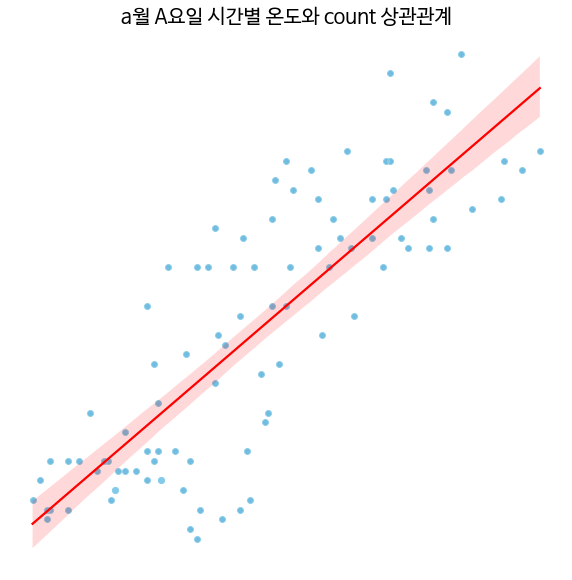

In [130]:
temp_hour_fix_month_weekday(ts_df, 'a', 'A')

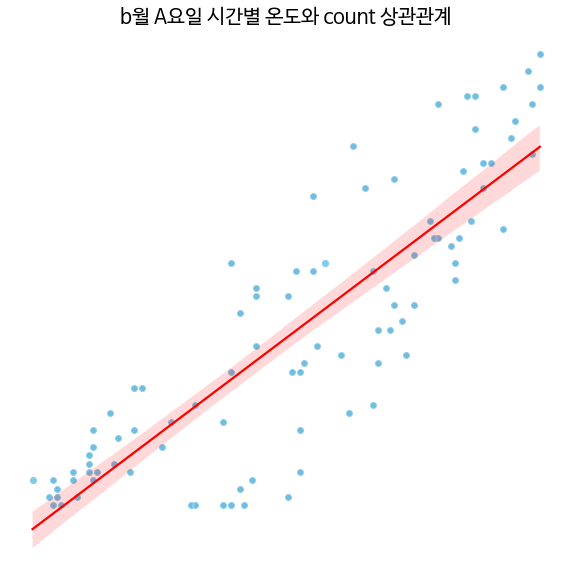

In [132]:
temp_hour_fix_month_weekday(ts_df, 'b', 'A')

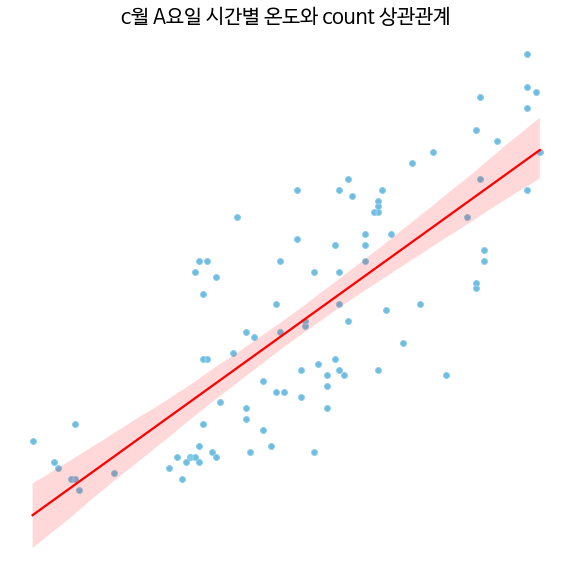

In [134]:
temp_hour_fix_month_weekday(ts_df, 'c', 'A')

- 월별 A요일을 비교하였을 경우, 온도와 count는 뚜렷한 양의 상관관계를 보임

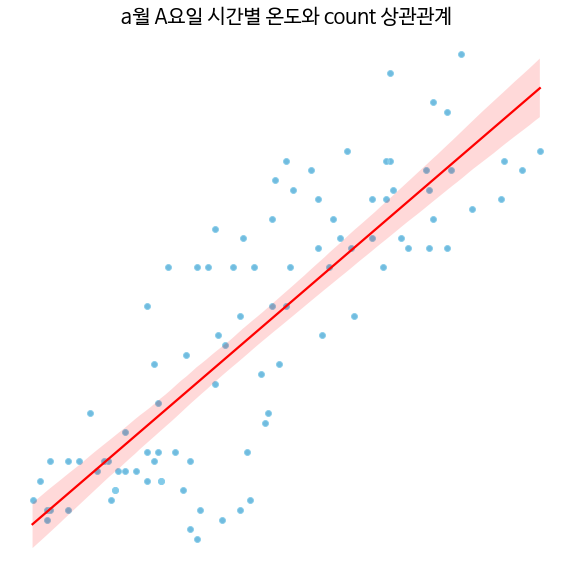

In [136]:
temp_hour_fix_month_weekday(ts_df, 'a', 'A')

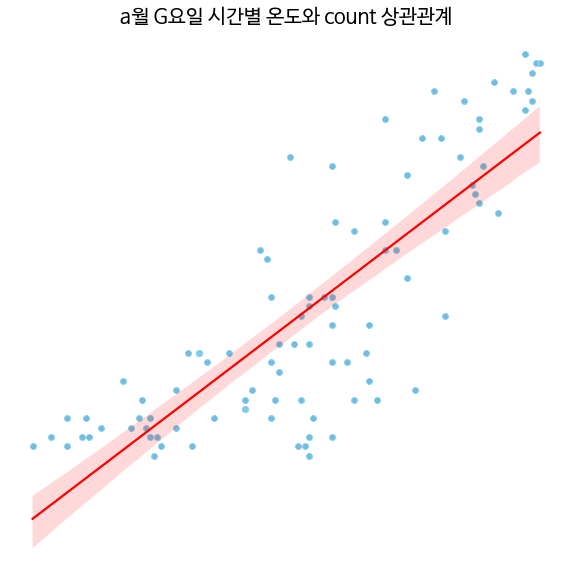

In [137]:
temp_hour_fix_month_weekday(ts_df, 'a', 'G')

- a월의 요일별 비교하였을 경우, 온도와 count는 뚜렷한 상관관계를 보임

In [100]:
def humi_hour_fix_month_weekday(df, month, weekday):
  plt.figure(figsize=(10,10))
  plt.title(str(month) + '월 ' + weekday_list[weekday] + ' 시간별 습도와 count 상관관계', fontsize=20)
  sns.scatterplot(data=df[(df['month'] == month) & (df['weekday'] == weekday)][['humidity', 'count']], x='humidity', y='count')
  sns.regplot(data=ts_df[(ts_df['month'] == month) & (ts_df['weekday'] == weekday)][['humidity', 'count']], x='humidity', y='count', scatter_kws = {'color': 'skyblue'}, line_kws = {'color': 'blue'})
  plt.axis('off')

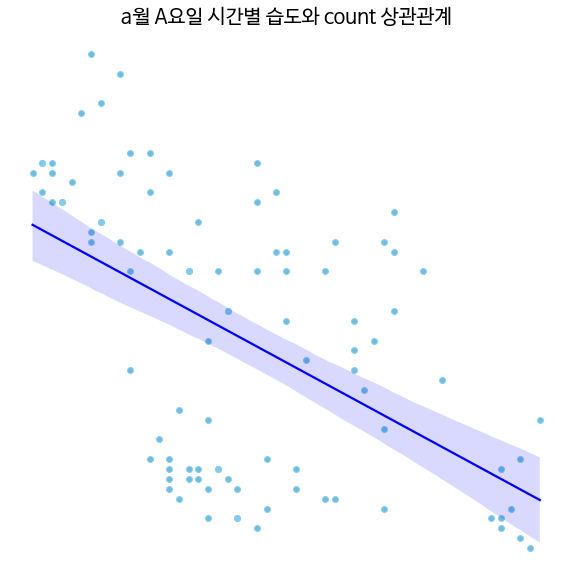

In [139]:
humi_hour_fix_month_weekday(ts_df, 'a', 'A')

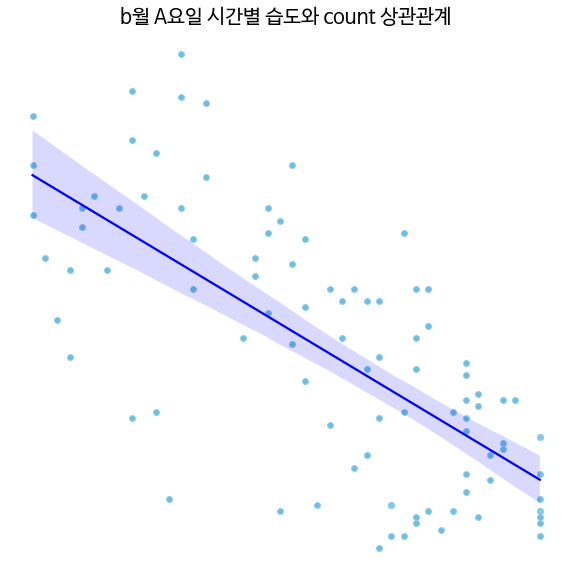

In [141]:
humi_hour_fix_month_weekday(ts_df, 'b', 'A')

- 월별 A요일을 비교하였을 경우, 습도와 count는 뚜렷한 음의 상관관계를 보임
- 온도보다 습도가 상관관계는 약간 약하게 보임

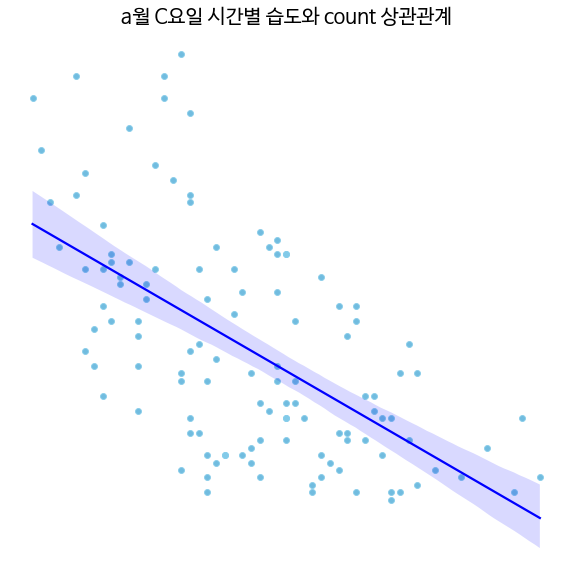

In [144]:
humi_hour_fix_month_weekday(ts_df, 'a', 'C')

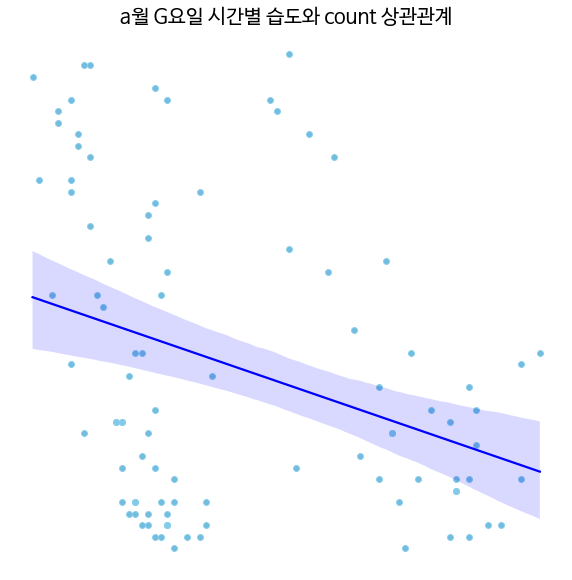

In [145]:
humi_hour_fix_month_weekday(ts_df, 'a', 'G')

- 시간 단위로 파악하였을 때, 특정 요일에 count와 습도의 상관관계는 약해지는 것을 파악함
- 비교적 일정한 범위에서 값을 가지는 날씨에 비해 count는 급증하는 날이 있어 나타나는 현상으로 파악됨

# regionA 월별 시간단위 날씨와 count의 상관관계

In [ ]:
regionA_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='A')
regionB_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='B')
regionC_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='C')
regionD_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='D')
regionE_df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time, location='E')

In [51]:
region_df_list = [regionA_df, regionB_df, regionC_df, regionD_df, regionE_df]

In [52]:
def making_time_col(region_df):
  region_df['month'] = pd.to_datetime(region_df['datetime']).dt.month
  region_df['day'] = pd.to_datetime(region_df['datetime']).dt.day
  region_df['hour'] = pd.to_datetime(region_df['datetime']).dt.hour
  region_df['weekday'] = pd.to_datetime(region_df['datetime']).dt.weekday

In [53]:
for region in region_df_list:
  making_time_col(region)

In [105]:
region_hour_corr(regionA_df)

,a,b,c,d,e,f,g,h,i,j,k
temp,0.533935,0.501820,0.509792,0.585153,0.617379,0.495486,0.422167,0.572464,0.365188,0.449009,0.533856
sensible_temp,0.473801,0.449282,0.428778,0.531355,0.570270,0.433546,0.412803,0.570750,0.331735,0.423411,0.512155
precipitation,0.021377,-0.014919,-0.031425,-0.027463,0.063878,0.030138,-0.123673,-0.037441,-0.077369,-0.060107,-0.063152
humidity,-0.220543,-0.338515,-0.428153,-0.300866,-0.347028,-0.306076,-0.562896,-0.618991,-0.554098,-0.526908,-0.348628
windspeed,0.131816,0.095393,0.433416,0.301118,0.353892,0.330697,0.287543,0.260918,0.180255,0.160179,-0.011458
finedust10,-0.093817,0.243186,0.094111,0.311758,0.183690,0.024744,0.008316,-0.070781,-0.045160,0.115754,0.108480
finedust25,-0.123093,-0.085648,0.029781,0.195094,0.022590,-0.025650,-0.034159,-0.083839,-0.117447,0.010011,0.008555


- regionA에서 매월 온도, 체감온도와 count는 뚜렷한 양의 상관관계를 보임
- regionA에서 매월 습도와 count는 뚜렷한 음의 상관관계를 보임
- 월별 시간단위에서 온도, 체감온도, 습도는 count와 뚜렷한 상관관계를 보임

# regionB 월별 시간단위 날씨와 count의 상관관계

In [106]:
region_hour_corr(regionB_df)

,a,b,c,d,e,f,g,h,i,j,k
temp,0.533935,0.501820,0.509792,0.585153,0.617379,0.495486,0.422167,0.572464,0.365188,0.449009,0.533856
sensible_temp,0.473801,0.449282,0.428778,0.531355,0.570270,0.433546,0.412803,0.570750,0.331735,0.423411,0.512155
precipitation,0.021377,-0.014919,-0.031425,-0.027463,0.063878,0.030138,-0.123673,-0.037441,-0.077369,-0.060107,-0.063152
humidity,-0.220543,-0.338515,-0.428153,-0.300866,-0.347028,-0.306076,-0.562896,-0.618991,-0.554098,-0.526908,-0.348628
windspeed,0.131816,0.095393,0.433416,0.301118,0.353892,0.330697,0.287543,0.260918,0.180255,0.160179,-0.011458
finedust10,-0.093817,0.243186,0.094111,0.311758,0.183690,0.024744,0.008316,-0.070781,-0.045160,0.115754,0.108480
finedust25,-0.123093,-0.085648,0.029781,0.195094,0.022590,-0.025650,-0.034159,-0.083839,-0.117447,0.010011,0.008555


- regionB에서 매월 온도, 체감온도와 count는 뚜렷한 양의 상관관계를 보임
- regionB에서 매월 습도와 count는 뚜렷한 음의 상관관계를 보임
- 월별 시간단위에서 온도, 체감온도, 습도는 count와 뚜렷한 상관관계를 보임

# regionC 월별 시간단위 날씨와 count의 상관관계

In [107]:
region_hour_corr(regionC_df)

,a,b,c,d,e,f,g,h,i,j,k
temp,0.533935,0.501820,0.509792,0.585153,0.617379,0.495486,0.422167,0.572464,0.365188,0.449009,0.533856
sensible_temp,0.473801,0.449282,0.428778,0.531355,0.570270,0.433546,0.412803,0.570750,0.331735,0.423411,0.512155
precipitation,0.021377,-0.014919,-0.031425,-0.027463,0.063878,0.030138,-0.123673,-0.037441,-0.077369,-0.060107,-0.063152
humidity,-0.220543,-0.338515,-0.428153,-0.300866,-0.347028,-0.306076,-0.562896,-0.618991,-0.554098,-0.526908,-0.348628
windspeed,0.131816,0.095393,0.433416,0.301118,0.353892,0.330697,0.287543,0.260918,0.180255,0.160179,-0.011458
finedust10,-0.093817,0.243186,0.094111,0.311758,0.183690,0.024744,0.008316,-0.070781,-0.045160,0.115754,0.108480
finedust25,-0.123093,-0.085648,0.029781,0.195094,0.022590,-0.025650,-0.034159,-0.083839,-0.117447,0.010011,0.008555


- regionC에서 매월 온도, 체감온도와 count는 뚜렷한 양의 상관관계를 보임
- regionC에서 매월 습도와 count는 뚜렷한 음의 상관관계를 보임
- 월별 시간단위에서 온도, 체감온도, 습도는 count와 뚜렷한 상관관계를 보임

# regionD 월별 시간단위 날씨와 count의 상관관계

In [108]:
region_hour_corr(regionD_df)

,a,b,c,d,e,f,g,h,i,j,k
temp,0.533935,0.501820,0.509792,0.585153,0.617379,0.495486,0.422167,0.572464,0.365188,0.449009,0.533856
sensible_temp,0.473801,0.449282,0.428778,0.531355,0.570270,0.433546,0.412803,0.570750,0.331735,0.423411,0.512155
precipitation,0.021377,-0.014919,-0.031425,-0.027463,0.063878,0.030138,-0.123673,-0.037441,-0.077369,-0.060107,-0.063152
humidity,-0.220543,-0.338515,-0.428153,-0.300866,-0.347028,-0.306076,-0.562896,-0.618991,-0.554098,-0.526908,-0.348628
windspeed,0.131816,0.095393,0.433416,0.301118,0.353892,0.330697,0.287543,0.260918,0.180255,0.160179,-0.011458
finedust10,-0.093817,0.243186,0.094111,0.311758,0.183690,0.024744,0.008316,-0.070781,-0.045160,0.115754,0.108480
finedust25,-0.123093,-0.085648,0.029781,0.195094,0.022590,-0.025650,-0.034159,-0.083839,-0.117447,0.010011,0.008555


- regionD에서 매월 온도, 체감온도와 count는 뚜렷한 양의 상관관계를 보임
- regionD에서 매월 습도와 count는 뚜렷한 음의 상관관계를 보임
- 월별 시간단위에서 온도, 체감온도, 습도는 count와 뚜렷한 상관관계를 보임

# regionE 월별 시간단위 날씨와 count의 상관관계

In [109]:
region_hour_corr(regionE_df)

,a,b,c,d,e,f,g,h,i,j,k
temp,0.533935,0.501820,0.509792,0.585153,0.617379,0.495486,0.422167,0.572464,0.365188,0.449009,0.533856
sensible_temp,0.473801,0.449282,0.428778,0.531355,0.570270,0.433546,0.412803,0.570750,0.331735,0.423411,0.512155
precipitation,0.021377,-0.014919,-0.031425,-0.027463,0.063878,0.030138,-0.123673,-0.037441,-0.077369,-0.060107,-0.063152
humidity,-0.220543,-0.338515,-0.428153,-0.300866,-0.347028,-0.306076,-0.562896,-0.618991,-0.554098,-0.526908,-0.348628
windspeed,0.131816,0.095393,0.433416,0.301118,0.353892,0.330697,0.287543,0.260918,0.180255,0.160179,-0.011458
finedust10,-0.093817,0.243186,0.094111,0.311758,0.183690,0.024744,0.008316,-0.070781,-0.045160,0.115754,0.108480
finedust25,-0.123093,-0.085648,0.029781,0.195094,0.022590,-0.025650,-0.034159,-0.083839,-0.117447,0.010011,0.008555


- regionE에서 매월 온도, 체감온도는 count와 뚜렷한 양의 상관관계를 보임
- regionE에서 매월 습도는 count와 뚜렷한 음의 상관관계를 보임